# Принятие решений в бизнесе

Дано: перечень гипотез по увеличению выручки крупного интернет-магазина.
Приоретизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Задачи проекта:**
1. Приоретизация гипотез
 - Применить фреймворк ICE для приоритизации гипотез
 - Применить фреймворк RICE для приоритизации гипотез
 - Выводы по итогам приоритизации разными фреймворками
2. Анализ A/B-теста
 - Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
 - Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
 - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
 - Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
 - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
 - Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
 - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
 - Построить точечный график стоимостей заказов. Сделать выводы и предположения.
 - Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
 - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
 - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
 - Принять решение по результатам теста и объяснить его. Варианты решений:
   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.

## Часть - приоретизация гипотез

Структура файла /datasets/hypothesis.csv:

    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Загрузим данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Применим фреймворк ICE для приоретизации гипотез

Найдем вес приоритета по формуле:

ICE = (Impact*Confidence)/Efforts

In [ ]:
#Добавим столбец с приоретизацией, ограничим вывод фреймворка одним знаком после запятой
hypothesis['ICE']=((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']).apply(lambda x: float("{:.1f}".format(x)))
#Отобразим столбец с описанием гипотезы полностью
pd.set_option('display.max_colwidth', None)
#Отсортируем гипотезы по убыванию приоритета
hypothesis.sort_values(by='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


ТОП-3 гипотезы для проверки имеют индексы 8,0,7.

### Применим фреймворк RICE для приоретизации гипотез

Найдем вес приоритета по формуле:

RICE = (Reach * Impact * Confidence)/Efforts

In [ ]:
hypothesis['RICE']=((hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']).apply(lambda x: float("{:.1f}".format(x)))
hypothesis.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


ТОП-3 гипотезы для проверки имеют индексы 7,2,0.

### ICE и RICE - сравнение

Приоретизация гипотез при применении разных методов изменилась. Для метода ICE в ТОП-3 вошли: 8, 0, 7. Для метода RICE ТОП-3 это: 7, 2, 0. Это связано с тем, что при подсчете RICE применяется дополнительный множитель - Reach, то есть охват пользователей. И т.к. у гипотезы с индексом 7 это коэффициент максимален, она вышла на первое место по приоретету.

## Часть - анализ А/В теста

Структура файла /datasets/orders.csv:
    
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.

Структура файла /datasets/visitors.csv:

    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [ ]:
#Загрузим данные
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
#Изучим информацию в таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
#Проверим явные дубликаты
orders.duplicated().sum()

0

In [ ]:
#Проверим пропуски
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
# Таблица orders не содержит пропусков или дубликатов. Однако необходимо скорректировать тип данных в некоторых столбцах.
orders['transactionId'] = orders['transactionId'].astype('object')
orders['visitorId'] = orders['visitorId'].astype('object')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверим корректность изменений
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [ ]:
#Изучим информацию в таблице orders
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
#Проверим явные дубликаты
visitors.duplicated().sum()

0

In [ ]:
#Проверим пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
# Таблица visitors не содержит пропусков или дубликатов. Скорректируем только тип даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверим корректность изменений
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
#Проверим, есть ли в orders пользователи, которые оказались одновремено в двух группах
test = orders.pivot_table(index='visitorId', aggfunc = 'nunique').reset_index()
print('Количество пользователей, которые оказались одновременно в группах А и В, равно',\
      test.query('group == 2')['visitorId'].count())

Количество пользователей, которые оказались одновременно в группах А и В, равно 58


По идее нужно было бы убрать пересекающихся клиентов из исследуемых данных... И мы даже можем это сделать из таблицы orders. Но т.к. в таблице vizitors нет номеров заказа и нет айди юзеров, оттуда мы не сможем выцепить "проблемных" пользователей. Соответственно удалять ничего не будем, чтобы не перекосить данные. На практике можно было бы дозапросить недостающую информацию и провести чистку.

### Построим график кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

''

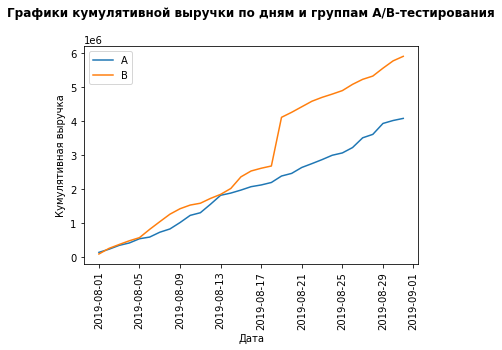

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation ='vertical')
plt.title("Графики кумулятивной выручки по дням и группам A/B-тестирования", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Кумулятивная выручка")
plt.xlabel("Дата")

plt.legend() 
;

Выручка растет в обеих тестовых группах. В начале теста (первые 5 дней) видим паритет обеих групп по выручке, однако примерно к концу первой недели группа В демонстрирует более высокие показатели. Примерно в середине второй недели в группе В происходит резкий скачок выручки - это может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Подобные выбросы требует дополнительного исследования и, возможно, зачистки.

### Построим график кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

''

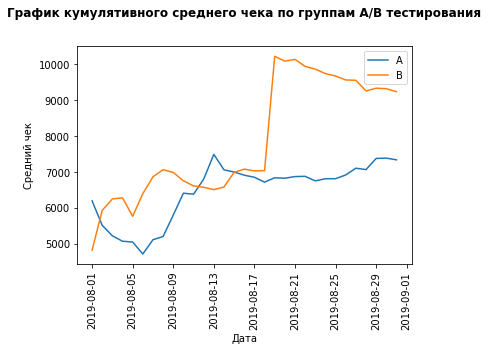

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation ='vertical')
plt.title("График кумулятивного среднего чека по группам А/В тестирования", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.legend() 
; 

Относительно группы А виден рост среднего чека на второй неделе и дальнейшая его стабилизация на уроне 7 тыс. Относительно группы В видна неравномерность среднего чека со скачками на первой неделе, резким ротом в середине второй недели теста и дальнейшим снижением. Скорее всего в систему попали аномально дорогие заказы. Т.к. по графику группы В сложно сделать вывод об установлении среднег чека, предполагаю, что необходимо больше данных (либо зачистка от выбросов в имеющихся данных).

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

''

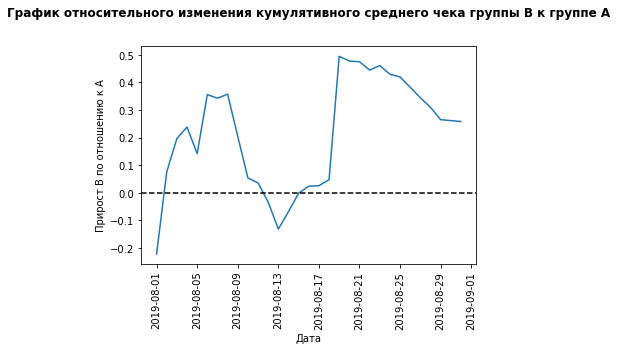

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation ='vertical')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Прирост В по отношению к А")
plt.xlabel("Дата")
;

Резкие скачки графика говорят о наличии в исходных данных выбросов - в количестве заказов или по выручке. 
В целом же видно, что в группе В более высокий средний чек по отношению к группе А.

### Построим график конверсии по группам

visitors['date'].min()

Построим графики среднего количества заказов на посетителя (конверсии) — разделим кумулятивное число заказов на кумулятивное число посетителей:

''

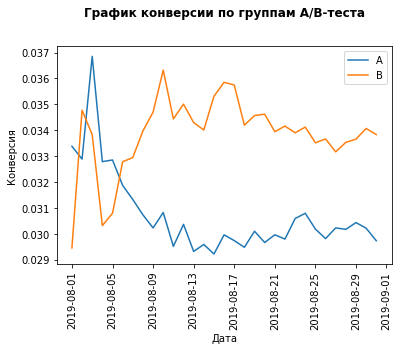

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation ='vertical') 
plt.title("График конверсии по группам А/В-теста", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Конверсия")
plt.xlabel("Дата")
;

После начала теста количество заказов в группе А - падает, а в группе В - растет. В обеих группах показатели зафиксировались: для группы А - конверсия на уровне около 3%, для группы В - около 3,4%. Показатели группы В лучше.

### Построим график относительного изменения кумулятивных конверсий группы B к группе A

''

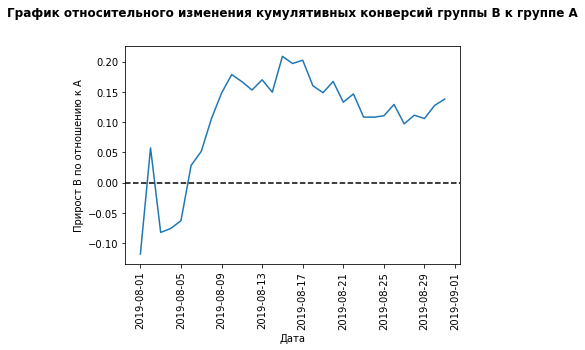

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation ='vertical')
plt.title("График относительного изменения кумулятивных конверсий группы B к группе A", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Прирост В по отношению к А")
plt.xlabel("Дата")
;

На первой неделе теста наблюдали резкие скачки конверсии. На второй неделе произошел рост конверсии группы В по отношению к А.
В целом, в течение второй и начале третьей недели наблюдался тренд на снижение конверсии В по отношению к А. Предполагаю, что к концу теста отношение установилось на уровне 13% группы В по отношению к группе А.

### Построим точечный график количества заказов по пользователям

In [ ]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


''

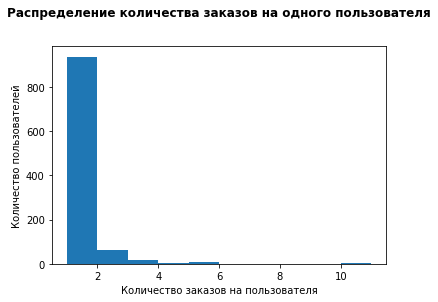

In [ ]:
#Построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders'])
plt.title("Распределение количества заказов на одного пользователя", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Количество пользователей")
plt.xlabel("Количество заказов на пользователя")
;

Видно, что большинство пользователей совершили 1 заказ. Часть пользователей заказывали 2-3 раза. Больше 10 заказов - это явные выбросы.

''

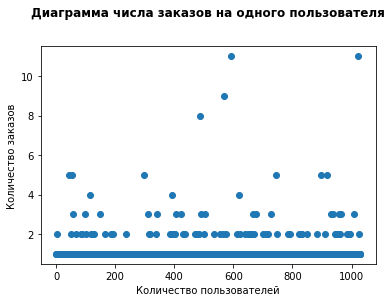

In [ ]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Диаграмма числа заказов на одного пользователя", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Количество заказов")
plt.xlabel("Количество пользователей")
;

Выводы подтверждаются: у основного большинства пользователей только один заказ, много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Пользователи с количеством заказов больше 4 - скорее всего аномалии. 

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше 2 заказов. Не более 1% оформили больше 4 заказов. 
Думаю, оптимально будет выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Так мы отбросим 5% от выборки.

### Построим точечный график стоимостей заказов

''

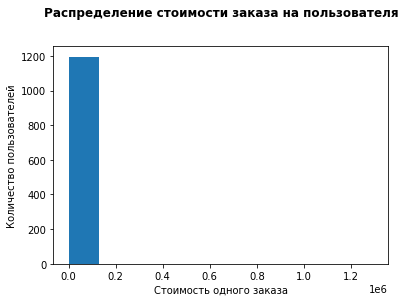

In [ ]:
#Построим гистрограмму распределения стоимостей заказов
plt.hist(orders['revenue'])
plt.title("Распределение стоимости заказа на пользователя", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Количество пользователей")
plt.xlabel("Стоимость одного заказа")
;

Видно, что большинство заказов приносит выручку до 100 тыс. Однако, есть и аномальные заказы с чеком более 1,2 млн.

''

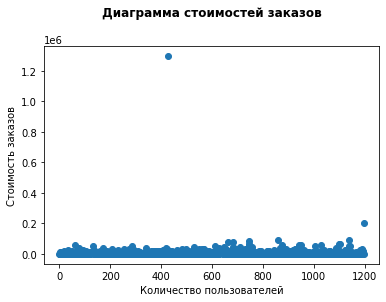

In [ ]:
#Построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Диаграмма стоимостей заказов", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Стоимость заказов")
plt.xlabel("Количество пользователей")
;

''

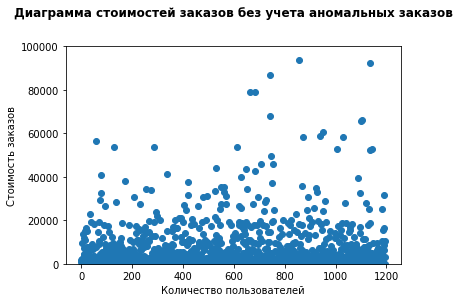

In [ ]:
#Построим точечную диаграмму стоимостей заказов с поправкой на масштаб
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim([0, 100000])
plt.title("Диаграмма стоимостей заказов без учета аномальных заказов", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Стоимость заказов")
plt.xlabel("Количество пользователей")
;

Видно, что основное большинство заказов находится в стоимостном диапазоне до 20 тыс.

Как и предполагалось, есть 2 явно выбивающихся заказа более 1,2 млн. и 200 тыс. руб. Скорее всего они, попадая в одну из групп теста (предположительно В), искажают результаты.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 тыс. Не более 1% заказов дороже 58,2 тыс. Думаю, оптимально будет выбрать 50 тыс. за верхнюю границу выручки за заказ, и отсеять аномальные заказы по ней - так мы отбросим около 1% аномальных данных.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. 

Подготовим данные, сгенерировав таблицу data, где:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

**Проверим гипотезы при помощи статистического критерия Манна-Уитни, зададим уровень значимости alpha на уровне 0,05.**

In [ ]:
#Количество пользователей по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Количество пользователей по дням в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [ ]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

В sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().
Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
Выведем относительный прирост среднего числа заказов группы B: (среднее число заказов группы B / среднее число заказов группы A) -1. Округлим до трёх знаков после запятой.

In [ ]:
#Критерий Манна-Уитни
print("p-value по критерию Манна-Уитни","{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#Прирост среднего числа заказов
print("Прирост среднего числа заказов","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value по критерию Манна-Уитни 0.017
Прирост среднего числа заказов 0.138


Критерий p-value меньше стат. значимости (0,017<0,05), следовательно мы отвергаем нулевую гипотезу о том, что различий в количестве заказов между группами нет.
Прирост среднего числа заказов в группе В составляет 13,8% по отношению к группе А.
Соответственно сырые данные показывают значительно более высокие результаты группы В по отношению к группе А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов
print("p-value по критерию Манна-Уитни",'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
#Найдём относительные различия в среднем чеке между группами
print("Прирост в среднем чеке",'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value по критерию Манна-Уитни 0.729
Прирост в среднем чеке 0.259


P-value значительно больше 0.05. Значит, мы не отвергаем нулевую гипотезу и принимаем, что средние чеки в исследуемх группах схожи. При этом, средний чек группы B значительно выше среднего чека группы A - на 25,9%. Вывод довольно противоречивый и, скорее всего, связан с выбросами в сырых данных.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 50 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [ ]:
#Сделаем срезы пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
#Сделаем срезы пользователей совершивших заказы дороже 50 000
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#Объединим данные
print(abnormalUsers.head(5))
#Узнаем, сколько всего аномальных пользователей атрибутом shape
print("Всего аномальных пользователей", abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: object
Всего аномальных пользователей 37


In [ ]:
#Для подсчета статистической значимости подготовим выборки количества заказов по пользователям по группам теста 
#по очищенным данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#Считаем стат. критерий
print("p-value по критерию Манна-Уитни",'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#Считаем прирост
print("Относительный прирост",'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value по критерию Манна-Уитни 0.008
Относительный прирост 0.182


По очищенным данным видим, что критерий p-value меньше стат. значимости (0,008<0,05), следовательно мы отвергаем нулевую гипотезу о том, что различий в количестве заказов между группами нет.
Прирост среднего числа заказов в группе В составляет 18,2% по отношению к группе А.
Соответственно сырые и очищенныме данные показывают аналогичный результат: значительно более высокие результаты группы В по отношению к группе А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print("p-value по критерию Манна-Уитни",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный прирост",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value по критерию Манна-Уитни 0.940
Относительный прирост 0.019


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B не сильно отличается от среднего чека по группе А. Это говорит о том, что выбросы, наблюдаемые в сырых данных, исказили предыдущий вывод в отношении среднего чека.

### Выводы по А/В тесту

Построим графики различия конверсии между группами и различия среднего чека по отфильтрованным данным и сделаем итоговые выводы.

''

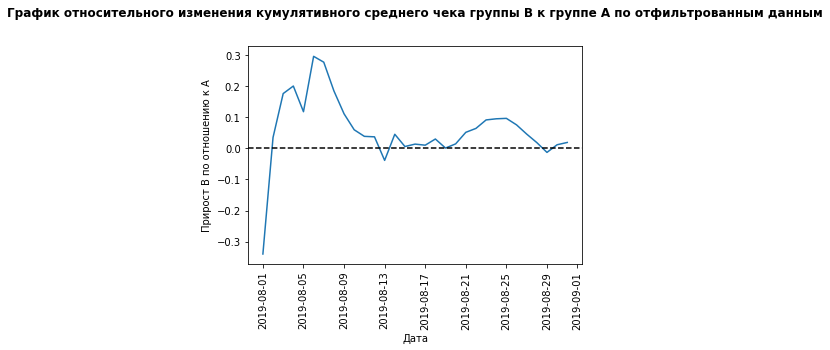

In [ ]:
#Фильтруем аномальных пользователей
orders_filtr=orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# создаем массив уникальных пар значений дат и групп теста
datesGroups_filtr = orders_filtr[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated_filtr = datesGroups_filtr.apply(lambda x: orders_filtr[np.logical_and(orders_filtr['date'] <= x['date'], orders_filtr['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated_filtr = datesGroups_filtr.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData_filtr = ordersAggregated_filtr.merge(visitorsAggregated_filtr, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_filtr.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_filtr = cumulativeData_filtr[cumulativeData_filtr['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_filtr = cumulativeData_filtr[cumulativeData_filtr['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue_filtr = cumulativeRevenueA_filtr.merge(cumulativeRevenueB_filtr, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
# график относительного изменения кумулятивного среднего чека группы B к группе A
plt.plot(mergedCumulativeRevenue_filtr['date'], (mergedCumulativeRevenue_filtr['revenueB']/mergedCumulativeRevenue_filtr['ordersB'])/(mergedCumulativeRevenue_filtr['revenueA']/mergedCumulativeRevenue_filtr['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation ='vertical')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A по отфильтрованным данным", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Прирост В по отношению к А")
plt.xlabel("Дата")
;

''

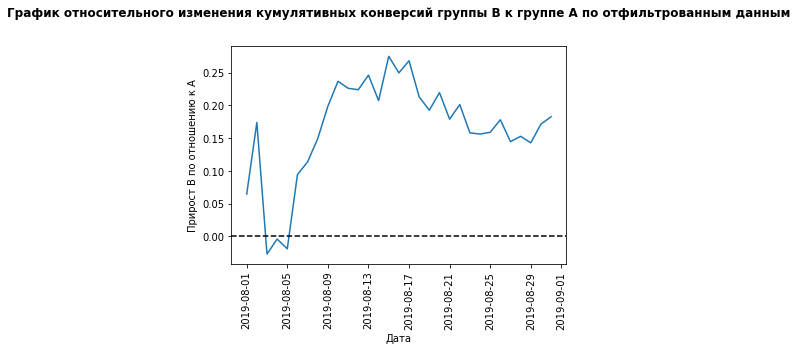

In [ ]:
# считаем кумулятивную конверсию
cumulativeData_filtr['conversion'] = cumulativeData_filtr['orders']/cumulativeData_filtr['visitors']

# отделяем данные по группе A
cumulativeDataA_filtr = cumulativeData_filtr[cumulativeData_filtr['group']=='A']

# отделяем данные по группе B
cumulativeDataB_filtr = cumulativeData_filtr[cumulativeData_filtr['group']=='B']

# собираем данные в одном датафрейме
mergedCumulativeConversions_filtr = cumulativeDataA_filtr[['date','conversion']].merge(cumulativeDataB_filtr[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение конверсий
# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeConversions_filtr['date'], mergedCumulativeConversions_filtr['conversionB']/mergedCumulativeConversions_filtr['conversionA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation ='vertical')
plt.title("График относительного изменения кумулятивных конверсий группы B к группе A по отфильтрованным данным", fontsize=12, fontweight='bold', pad=30)
plt.ylabel("Прирост В по отношению к А")
plt.xlabel("Дата")
;

**Выводы**


*Была проведена приоретизация гипотез с применением методов ICE и RICE. 
ТОП-3 гипотезы для проверки по методу ICE это:*
- *Запустить акцию, дающую скидку на товар в день рождения*
- *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*
- *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

*ТОП-3 гипотезы для проверки по методы RICE:*
- *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*
- *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*
- *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*

*Разница в приоретизации связана с дополнительным критерием оценки методом RICE - критерием охвата пользователей; в то время как ICE учитывает только силу влияния изменяемой метрики, уверенность в оценках параметров и сложность проверки гипотезы.*

Как по сырым, так и по очищенным данным, мы удостоверились в том, что конверсия между группами А и В имеет статистическое различие. Проведенныне тесты показали, что p-value в тесте на сырых и очищенных данных существенно ниже заданного уровня значимости, соответственно нулевая гипотеза об отсутствии различий в данных, отвергнута. Также на этот факт укзывает существенный прирост конверсии в группе В по отношению к группе А - по очищенным данным он составил более 18%.


С точки зрения метрики среднего чека сырые данные показали существенное различие между исследуемыми группами. После удаления аномальных значений мы убедились, что средний чек в обеих группах идентичен, нулевая гипотеза не отвергнута. Таким образом, выбросы в сырых данные исказили результат до прямо противоположного. Фактический прирост среднего чека группы В по отношению к группе А составил менее 2%, что по тесту Манна-Уитни не является статистически значимым. 


График различия конверсии между группами по отфильтрованным данным сообщает, что результаты группы B лучше группы A: в среднем на 17%, значения стабилизировались. График, построенный по сырым данным идентичен графику по отфильтрованным данным.

График различия средних чеков по отфильтрованным данным показывает идентичность средних чеков в обеих исследуемых группах, значения стабилизированы. График по неотфильтрованным данным явно указывал на аномалии в исходных данных.


Таким образом, данный тест можно прекратить и признать, что группа В демонстрируем более высокие показатели конверсии по отношению к группе А.
